# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

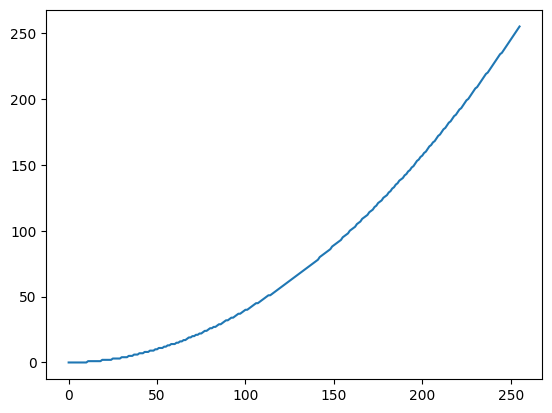

In [3]:
import lut 
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

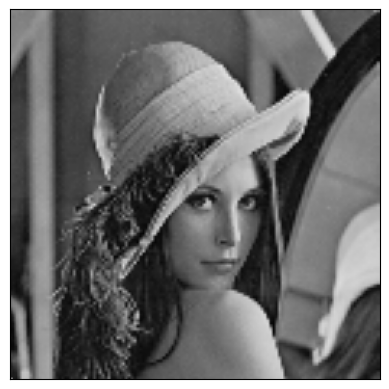

In [4]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

# fileName = 'jet.bmp'
# if not os.path.exists(fileName) :
#     r = requests.get(url + fileName, allow_redirects=True)
#     open(fileName, 'wb').write(r.content)

lena = cv2.imread(fileName)

plt.imshow(lena)
plt.xticks([]), plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

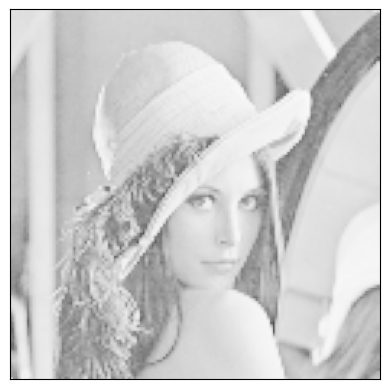

In [5]:
lena_log = cv2.LUT(lena,lut.log)
plt.imshow(lena_log)
plt.xticks([]), plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [6]:
def LUT(image, t):
    image_new = cv2.LUT(image,t)
    f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15, 5))
    ax1.set_title('Original Image')
    ax1.imshow(image) 
    ax1.axis('off')

    ax2.set_title('New Image (LUT applied)')
    ax2.imshow(image_new)
    ax2.axis('off')

    ax3.set_title('LUT')
    ax3.plot(t) 
    ax3.grid(True) 
    
    plt.show()


Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

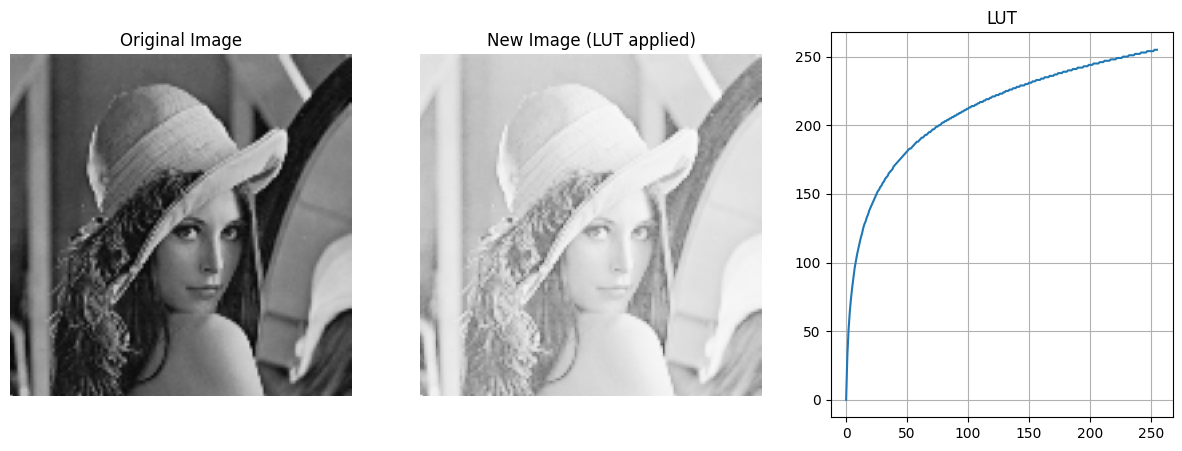

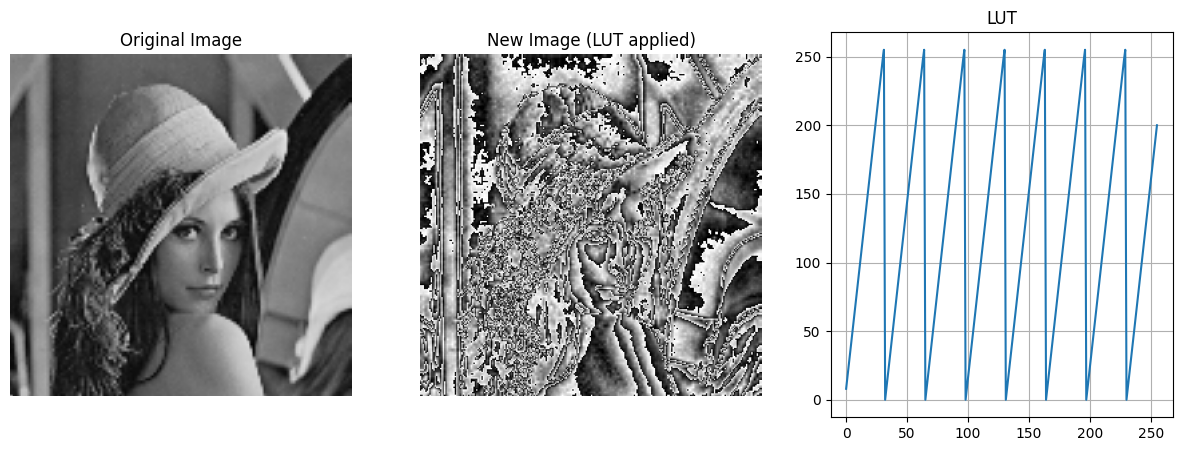

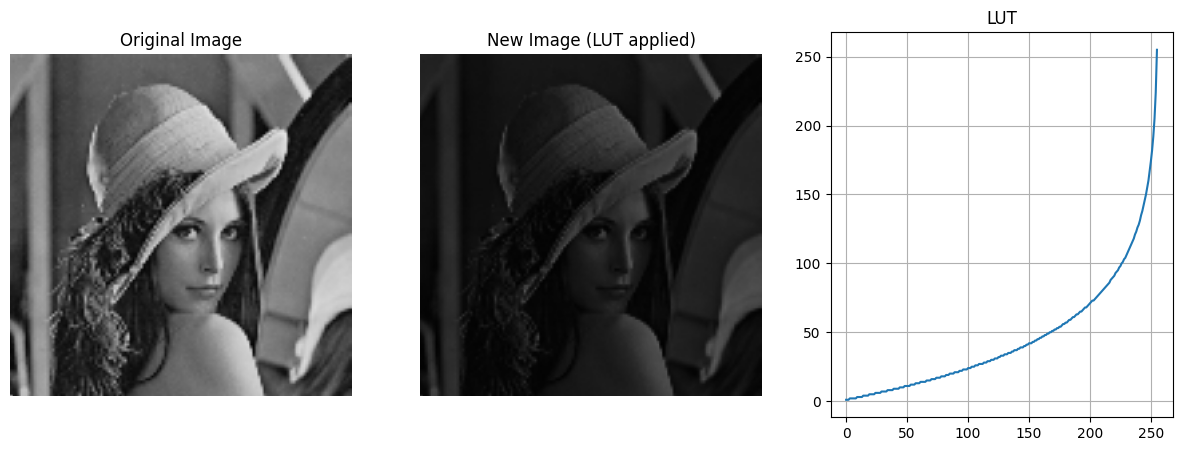

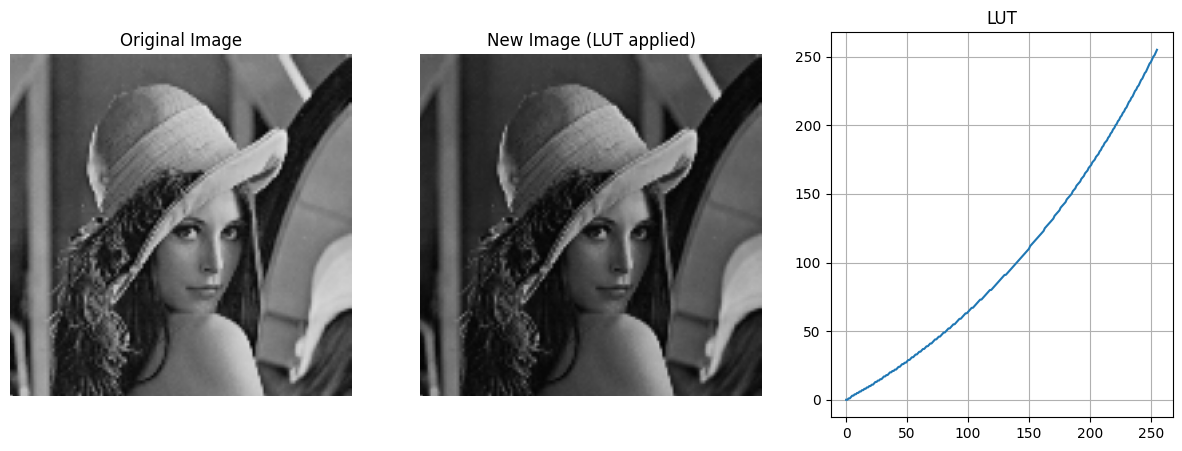

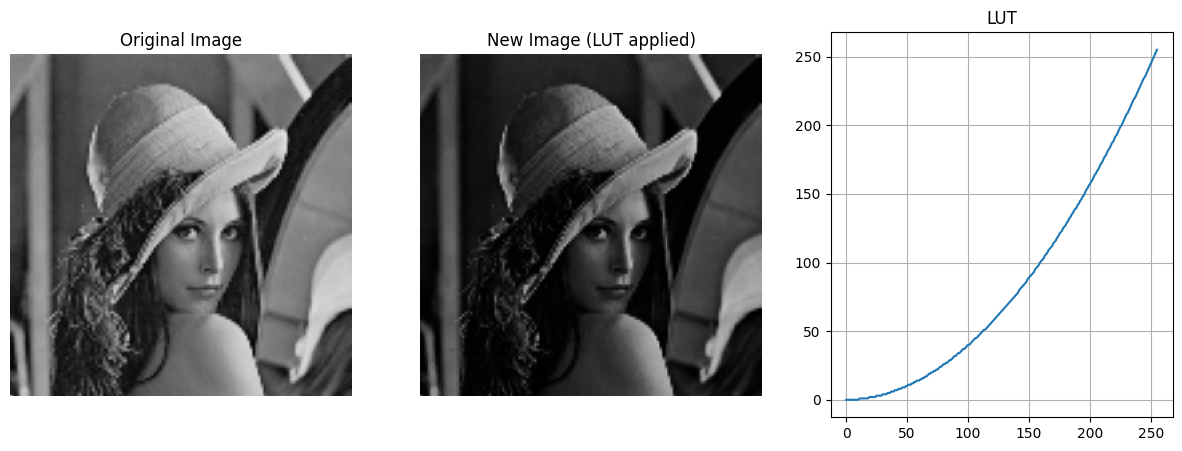

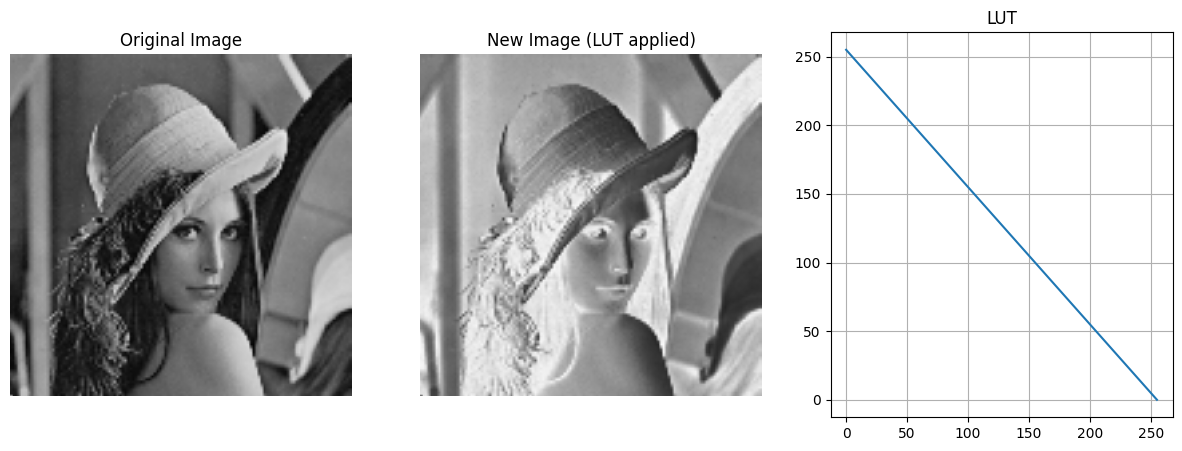

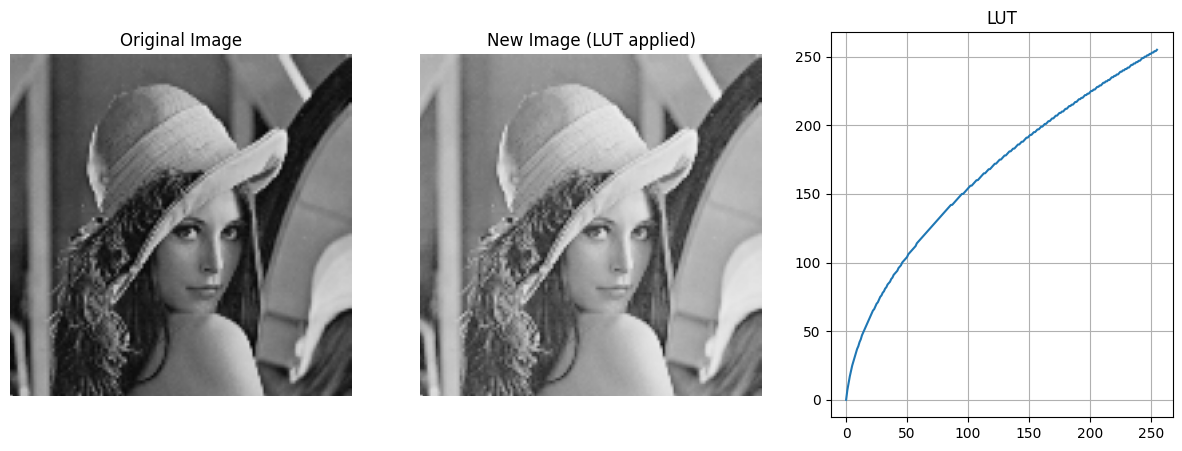

In [7]:
LUT(lena,lut.log)
LUT(lena,lut.pila)
LUT(lena,lut.odwlog)
LUT(lena,lut.wykladnicza)
LUT(lena,lut.kwadratowa)
LUT(lena,lut.odwrotna)
LUT(lena,lut.pierwiastkowa)


## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

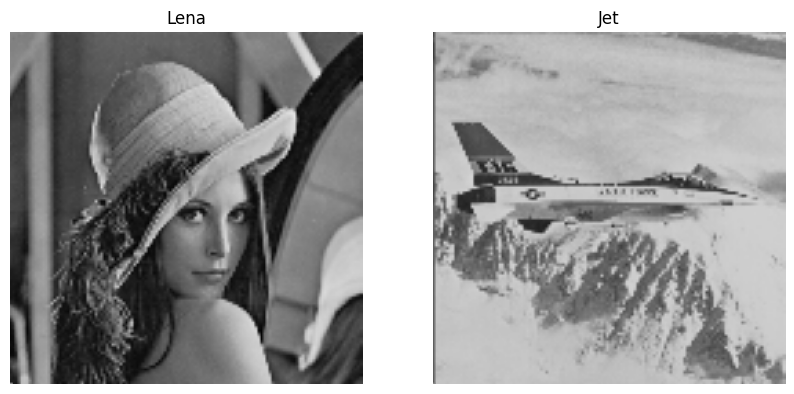

In [8]:
fileNameLena = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileNameJet = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

lena = cv2.imread(fileNameLena)
jet = cv2.imread(fileNameJet)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.set_title('Lena')
ax1.imshow(lena) 
ax1.axis('off')

ax2.set_title('Jet')
ax2.imshow(jet)
ax2.axis('off')
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

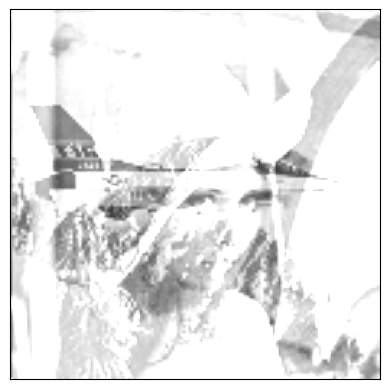

In [9]:
lena_and_jet = cv2.add(lena,jet)

plt.imshow(lena_and_jet)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

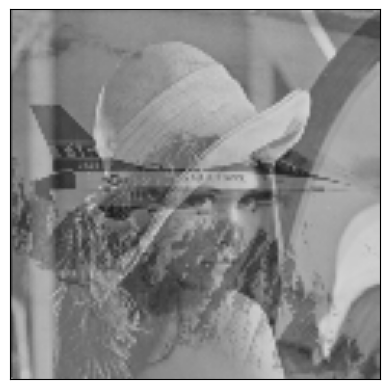

In [10]:
lena_and_jet_uint16 = cv2.add(lena.astype('uint16'),jet.astype('uint16'))

lena_and_jet_uint16 //= 2

plt.imshow(lena_and_jet_uint16.astype('uint8'))
plt.xticks([]), plt.yticks([])
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

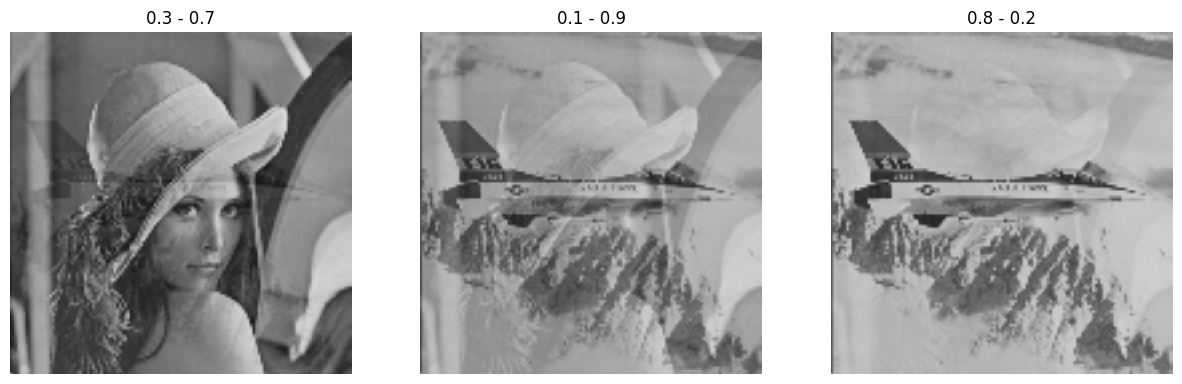

In [11]:
lena_and_jet_AW1 = cv2.addWeighted(lena,0.8, jet,0.2,0)
lena_and_jet_AW2 = cv2.addWeighted(lena,0.3, jet,0.7,0)
lena_and_jet_AW3 = cv2.addWeighted(lena,0.1, jet,0.9,0)

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15, 5))
ax1.set_title('0.3 - 0.7')
ax1.imshow(lena_and_jet_AW1) 
ax1.axis('off')

ax2.set_title('0.1 - 0.9')
ax2.imshow(lena_and_jet_AW2)
ax2.axis('off')

ax3.set_title('0.8 - 0.2')
ax3.imshow(lena_and_jet_AW3) 
ax3.axis('off')
    
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

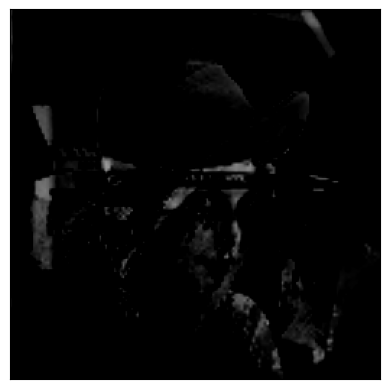

In [12]:
lena_sub_jet = cv2.subtract(lena,jet)

plt.imshow(lena_sub_jet)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

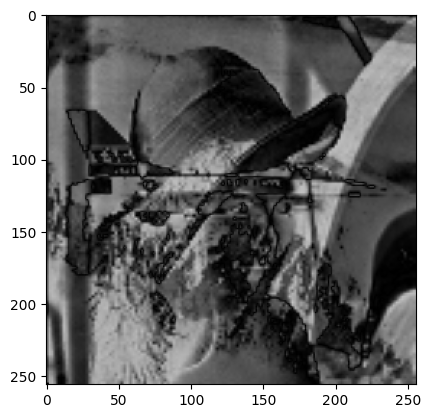

In [17]:
lena_sub_jet_uint16 = np.abs(cv2.subtract(lena.astype('int16'),jet.astype('int16')))

plt.imshow(lena_sub_jet_uint16.astype('uint8'))
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

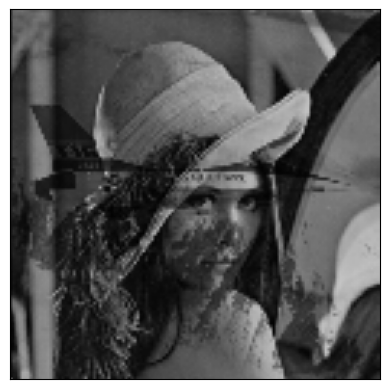

In [14]:
lena_multi_jet = cv2.multiply(lena.astype('float64'),jet.astype('float64'))
lena_multi_jet //= 225
plt.imshow(lena_multi_jet.astype('uint8'))
plt.xticks([]), plt.yticks([])
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

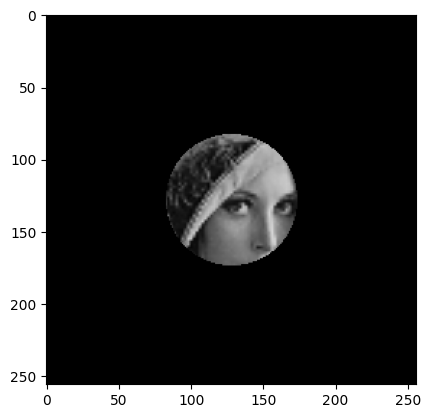

In [31]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

circle = cv2.imread(fileName)
circle2 = (circle).astype('bool').astype('uint8')

lena_multi_kolo = cv2.multiply(lena, circle2)
plt.imshow(lena_multi_kolo)
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

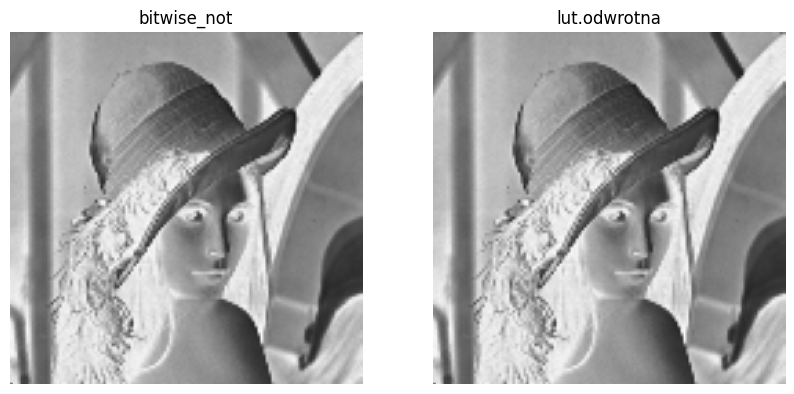

In [22]:
lena_neg1 = cv2.bitwise_not(lena)
lena_neg2 = cv2.LUT(lena,lut.odwrotna)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.set_title('bitwise_not')
ax1.imshow(lena_neg1) 
ax1.axis('off')

ax2.set_title('lut.odwrotna')
ax2.imshow(lena_neg2)
ax2.axis('off')

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

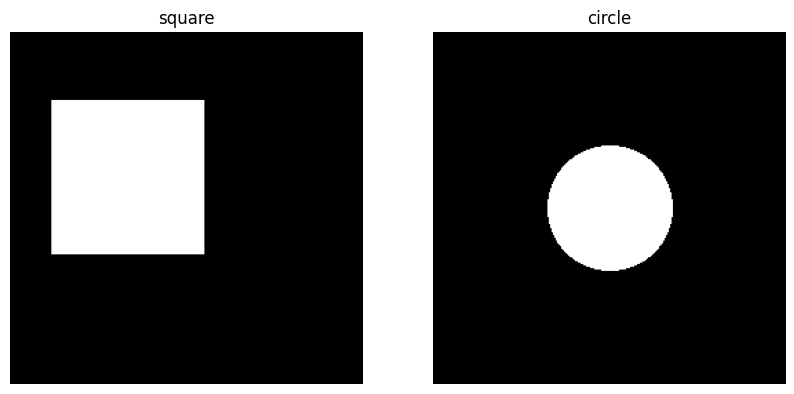

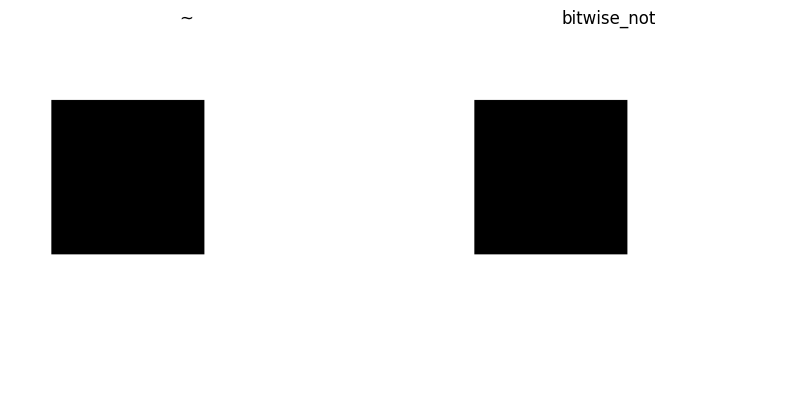

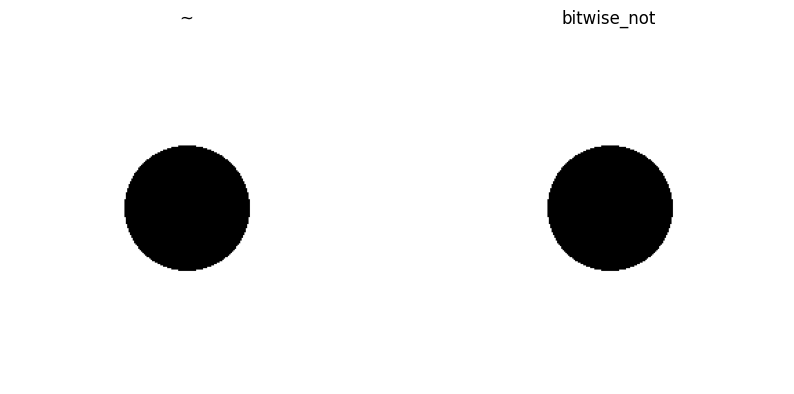

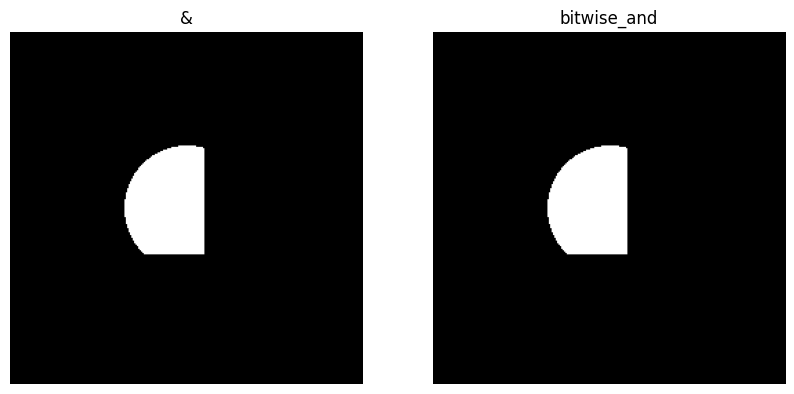

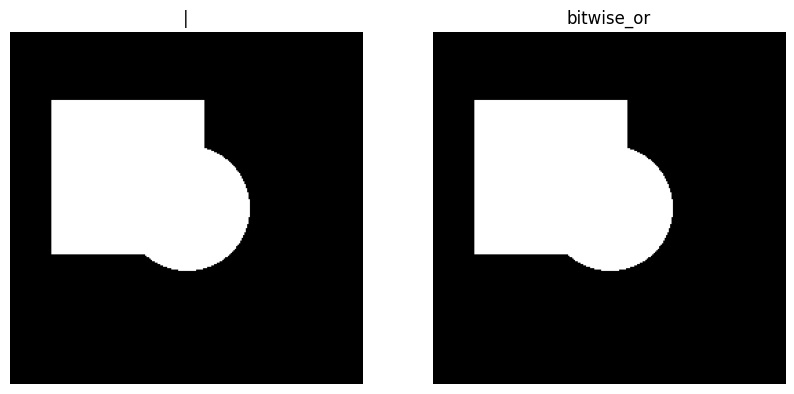

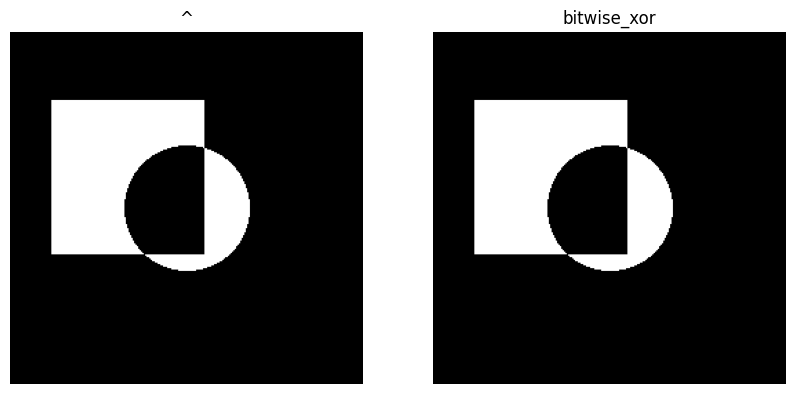

In [38]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

square = cv2.imread(fileName)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.set_title('square')
ax1.imshow(square) 
ax1.axis('off')
ax2.set_title('circle')
ax2.imshow(circle)
ax2.axis('off')


square_not1 = ~square
square_not2 = cv2.bitwise_not(square)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.set_title('~')
ax1.imshow(square_not1) 
ax1.axis('off')
ax2.set_title('bitwise_not')
ax2.imshow(square_not2)
ax2.axis('off')

circle_not1 = ~circle
circle_not2 = cv2.bitwise_not(circle)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.set_title('~')
ax1.imshow(circle_not1) 
ax1.axis('off')
ax2.set_title('bitwise_not')
ax2.imshow(circle_not2)
ax2.axis('off')


square_and_circle = circle &square
square_and_circle2 = cv2.bitwise_and(square,circle)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.set_title('&')
ax1.imshow(square_and_circle) 
ax1.axis('off')
ax2.set_title('bitwise_and')
ax2.imshow(square_and_circle2)
ax2.axis('off')

square_or_circle = circle | square
square_or_circle2 = cv2.bitwise_or(square,circle)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.set_title('|')
ax1.imshow(square_or_circle) 
ax1.axis('off')
ax2.set_title('bitwise_or')
ax2.imshow(square_or_circle2)
ax2.axis('off')


square_xor_circle = circle ^ square
square_xor_circle2 = cv2.bitwise_xor(square,circle)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.set_title('^')
ax1.imshow(square_xor_circle) 
ax1.axis('off')
ax2.set_title('bitwise_xor')
ax2.imshow(square_xor_circle2)
ax2.axis('off')

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.